In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.impute import SimpleImputer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [2]:
df = pd.read_csv('C:/data_science/kc_house_data.csv') #Input the dataset
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
df.info()
#No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [73]:
df1 = df.copy()
df1.drop('id', axis=1, inplace=True)#Dropping the irrelvant variable
df1

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [74]:
df1['date'] = pd.to_datetime(df1['date']) #converting date time by feature enginning
def grade_arr(x):
    if x <= 3:
        return 'low'
    elif x >= 4 and x < 7:
        return 'low_to_avg'
    elif x == 7:
        return 'avg'
    elif x > 7 and x <=10:
        return 'hign_to_avg'
    else:
        return 'high'

df1['grade_range'] = df1['grade'].apply(grade_arr) #converting grade to specific range
df1.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_range
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,avg
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,avg
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,low_to_avg
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,avg
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,hign_to_avg


In [75]:
grade_dummies = pd.get_dummies(df1['grade_range'], dtype= int) #Converting grade into each columns with dummy values
df1 = pd.concat([df1,grade_dummies], axis=1) #concat them together

In [76]:
df1.drop(['grade_range'], axis=1,inplace=True)#Since our column (grade range (Object value)) is already displayed as a dummy value with different
                                            # columns (low, low_to_avg, avg, high_to_avg, high)

In [77]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  zipcode        2161

In [78]:
df1['day'] = df1['date'].dt.day
df1['month'] = df1['date'].dt.month
df1['hour'] = df1['date'].dt.hour
df1['year'] = df1['date'].dt.year
df1.drop(columns= 'date',inplace=True) #Converting them into specific variables, like exact day or month

In [143]:
x = df1.drop('price', axis=1)#Set up Indepandent numerical + categorical variables
y = df1[['price']] #Set uo depandent variable
categorical_features = ['waterfront', 'view', 'condition','avg', 'high', 'hign_to_avg', 'low',
                                    'low_to_avg', 'yr_built' ,'yr_renovated']  # Specify the categorical column names

numerical_features = ['bedrooms' , 'bathrooms' , 'sqft_living' , 'sqft_lot', 'floors','sqft_above',
                      'sqft_basement'] # Specify the numerical column names

In [157]:
model = sm.OLS(y, x[categorical_features+numerical_features]) #do the OLS first to see how many there are influencial points
results = model.fit()
print(results.summary())
#fig, ax = plt.subplots(figsize=(12,8))
#fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks') 
# #return the graph

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     2531.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:51:43   Log-Likelihood:            -2.9664e+05
No. Observations:               21613   AIC:                         5.933e+05
Df Residuals:                   21597   BIC:                         5.934e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
waterfront     5.378e+05   1.91e+04     28.203

In [158]:
# Get the Cook's distance values for each data point
influence = results.get_influence()
cooks_d = influence.cooks_distance[0]

#Set the threshold to the top 5% of Cook's distance
cooksd_range = np.percentile(cooks_d, 95) 

# Filter with Cook's distance based on the range
filtered_indices = np.where(cooks_d < cooksd_range)[0]
filtered_x = x.iloc[filtered_indices]
filtered_y = y.iloc[filtered_indices]
filtered_model = sm.OLS(filtered_y, filtered_x[categorical_features+numerical_features])
filtered_results = filtered_model.fit()


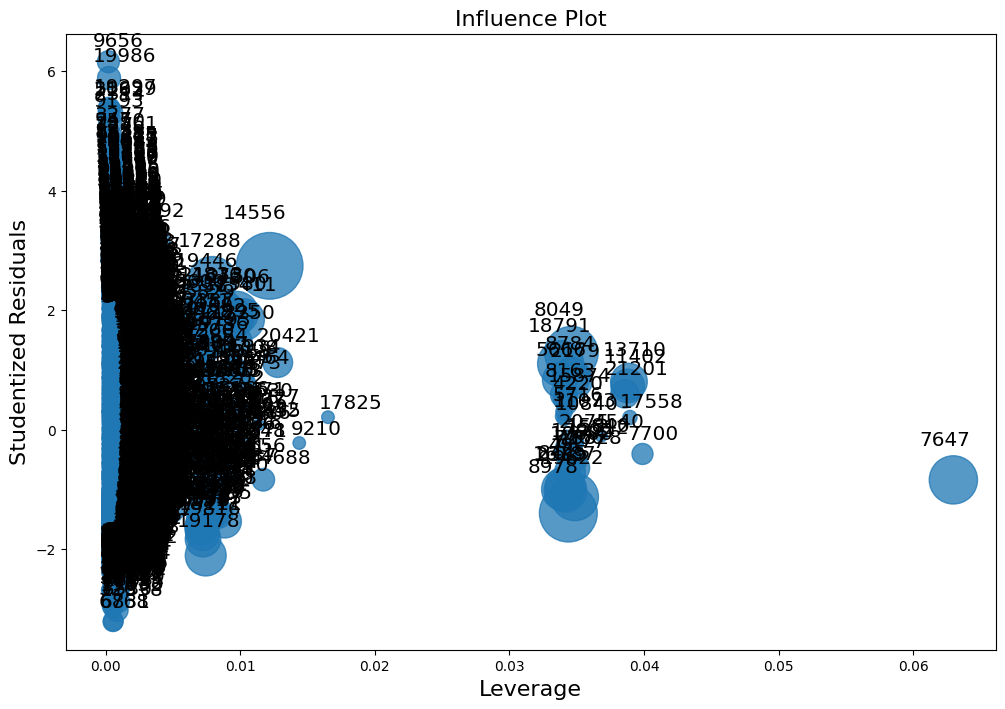

In [159]:
# Return the influence plot for the filtered results
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(filtered_results, ax=ax, criterion='cooks')

In [160]:

#set up the pipeline with specific process to deal with different data
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])
# Create the LASSO pipeline
LASSO_re = Pipeline(steps=[
    ('preprocessor', preprocessor),
    #('pca', PCA(n_components=2)),
    ('regressor', Lasso(alpha=2.0))
])
#Splitting the train and test dataset with 20% test dataset size.
x_train, x_test, y_train, y_test = train_test_split(filtered_x[categorical_features+numerical_features], filtered_y,test_size = 0.2, random_state=1234)
LASSO_re.fit(x_train, y_train)


c:\Users\hechu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1368352895354.75, tolerance: 101735111771.16376
  model = cd_fast.sparse_enet_coordinate_descent(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition', 'avg', 'high',
                                                   'hign_to_avg', 'low',
                                                   'low_to_avg', 'yr_built',
                                                   'yr_renovated']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'sqft_above',
                                                   'sqft_basement'])])),
                ('regressor', Lasso(alpha=2.0))])

In [161]:
pred = LASSO_re.predict(x_test) #return the prediction
pred

array([878380.9250117 , 694606.98913135, 229749.78679431, ...,
       336601.13987213, 515596.86565915, 152432.75982353])

In [162]:
np.sqrt(mean_squared_error(pred,y_test)) #calculate the RMSE

147131.7384425672

In [163]:
#Similar as above
Ridge_re = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=2.0))
])
x_train, x_test, y_train, y_test = train_test_split(filtered_x, filtered_y,test_size = 0.2, random_state=1234)
Ridge_re.fit(x_train, y_train)
pred_R = Ridge_re.predict(x_test)
np.sqrt(mean_squared_error(pred_R,y_test))

147039.85069174168

In [164]:
#Similar as above
Linear_re = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
x_train, x_test, y_train, y_test = train_test_split(filtered_x, filtered_y,test_size = 0.2, random_state=1234)
Linear_re.fit(x_train, y_train)
pred_L = Linear_re.predict(x_test)
np.sqrt(mean_squared_error(pred_L,y_test))

147182.93046013985

In [165]:
#Similar as above
El_re = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=2.0, l1_ratio=0.8))
])
x_train, x_test, y_train, y_test = train_test_split(filtered_x, filtered_y,test_size = 0.2, random_state=1234)
El_re.fit(x_train, y_train)
pred_E = El_re.predict(x_test)
np.sqrt(mean_squared_error(pred_E,y_test))

175300.53893483986

In [166]:
#Getting the feature name in the pipeline of preprocessors
categorical_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
#Grouping them togethor into one 
feature_names = numerical_features + list(categorical_feature_names)
# Get the coefficients from the Ridge regression model
lasso_coef = LASSO_re.named_steps['regressor'].coef_

# Combine the feature names with their corresponding coefficients
feature_coef = list(zip(feature_names,lasso_coef))

# Sort the feature_coef list based on the absolute values of the coefficients in descending order
top_features = [(feature, coef) for feature, coef in feature_coef if abs(coef) > 0]
# Sort the feature_coef list based on the absolute values of the coefficients in descending order
top_features.sort(key=lambda x: abs(x[1]), reverse=True)
# Print the top features and corresponding coefficients
for feature, coef in top_features:
    print(f"{feature}: {coef}")


condition_1: -624991.7853444545
bedrooms: -589812.418271433
yr_renovated_1945: 205809.86549925682
low_to_avg_0: 188643.32920867848
low_to_avg_1: 187256.2442153482
yr_built_1900: 171589.60825576374
sqft_basement: 171021.56137738374
high_0: 170278.83365906906
yr_built_1904: 168950.02773559885
yr_built_1902: 161766.27563218668
yr_built_1920: 159967.49602788
yr_built_1906: 158102.90558643412
yr_renovated_0: -157732.28298299082
yr_built_1909: 157353.99546177877
yr_built_1908: 150410.98804102588
yr_built_1917: 149765.95511957823
yr_renovated_1955: -146671.62203677633
high_1: 145821.94925317683
hign_to_avg_0: 144841.5767995225
yr_built_1918: 144834.82648665566
yr_built_1916: 144727.9401571365
yr_built_1915: 144240.84557839166
yr_built_1914: 141773.3266218426
yr_renovated_1967: -141094.9056029262
avg_0: 140317.07583952526
yr_built_1919: 140235.36708428725
yr_built_1903: 139028.3148860037
yr_renovated_2003: 135988.6214541391
yr_built_1912: 134668.32949399174
yr_built_1983: -134269.92466378206
y

Q1:\
In my code, first, I decided to ensure that there is not missing value in the dataset. And then droping the possible irrelvant variables, like ID. And then I tried to transfer some possible categorical variables into dummy vairables, such as Date and grade. Here I have setup 5 different level in grade, 1-3 is low level, 4-6 is low_to_avg level, 7 is avg, 8-10 is high_to_avg, 11-13 is high level. After the transfermation, I noticed that there is still many outliers. And so I designed to sort and filter influencial plots with 90%, which means that the top 10% outliers influencial would be removed from the dataset. And then putting the data into our pipeline that includes the process of standardization and one-hot encoding of our variables seperately. Finally, returning the predictions from different regression models.

Q2:\
Based on the model I learned in the class, Ridge regression model would be the best model I can build to estimate the house price. Based on the several model, I found that Ridge regression have samller R^2 value, and which means that the variance of the prediction is smaller. And so the most accurate model in those models is the Ridge regression model. And also, Multicollinearity would a problem to OLS, but LASSO and Ridge can handle the problem. These two models can also do the trade-off of bias-variance, which improved overall predictive performance. According to the several reasons, Ridge model will be the best model I can use in the prediction of house price.

Q3:\
Based on the best model I have built, the square root of MSE is still high as 147039, which means there are still many errors or any potential issues I didn't figure out. And this also means that the predition is not relaible to estimate the house price exactly. Although the square root of mean square error is high, I can still use the regression model to get some useful information, such as the importance of each features. AS I have shown above, the absolute value of each coefficients show that the strength of the relationship between them and the house price. So, we can see that the most influencial feature is 'bedrooms', which means a unit increase in the 'bedrooms' feature is associated with a decrease in the house price by -589812 units. Since the RMSE is high enough, we can not directly see how this feature influence the house price accurately. But we can expect that this driver is the feature that can decrease the price significantly once the unit increase in 'bedrooms'.